In [85]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [86]:
df_airline=pd.read_excel('Airlines+Data.xlsx')
df_airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [87]:
df_airline.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


# EDA

In [88]:
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [89]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [90]:
#Get Month column as index of data
df_airline.set_index('Month',inplace=True)

In [91]:
df_airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# Viz

<AxesSubplot: xlabel='Month'>

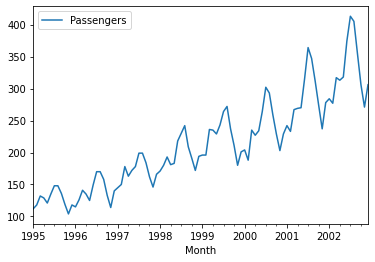

In [92]:
df_airline.plot()

### Histogram

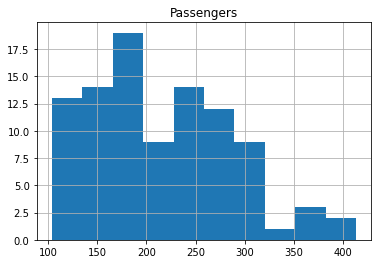

In [93]:
df_airline.hist()
plt.show()

### Distplot

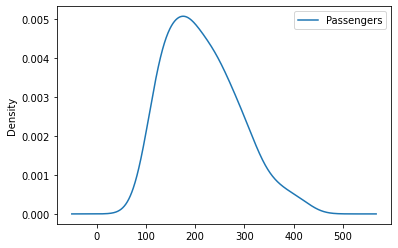

In [94]:
df_airline.plot(kind='kde')
plt.show()

### Lagplot

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

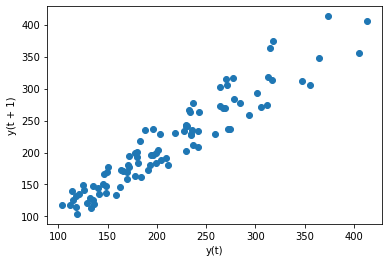

In [95]:
from pandas.plotting import lag_plot
lag_plot(df_airline)

In [96]:
airline=pd.read_excel('Airlines+Data.xlsx')
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [97]:
#Get month and year columns in our data

airline["month"] = airline.Month.dt.strftime("%b") # month extraction
airline["year"] = airline.Month.dt.strftime("%Y") # year extraction
airline.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


### Heatmap

<AxesSubplot: xlabel='month', ylabel='year'>

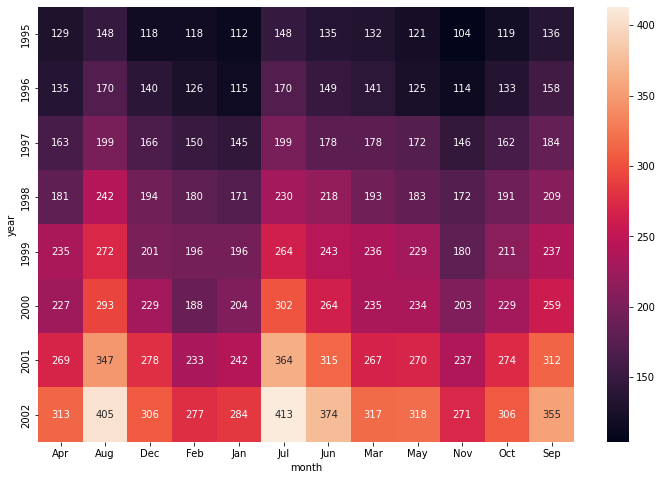

In [98]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

#### Years 2000 and after have higher number of passengers.
#### Jul and Aug have high passengers and Nov and Dec have lower passengers tarvelling

### Boxplot

<AxesSubplot: xlabel='year', ylabel='Passengers'>

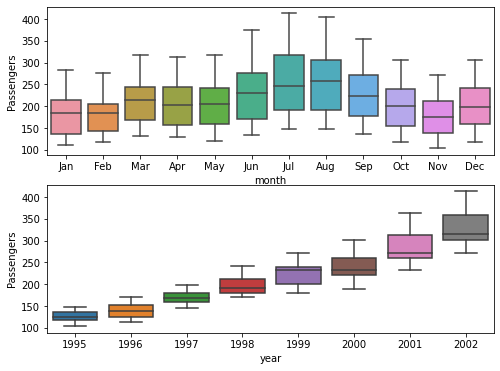

In [99]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airline)

<AxesSubplot: xlabel='year', ylabel='Passengers'>

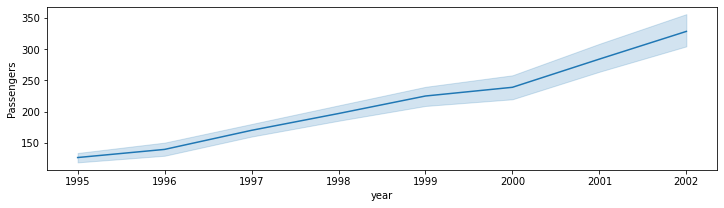

In [100]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airline)

### Moving Average

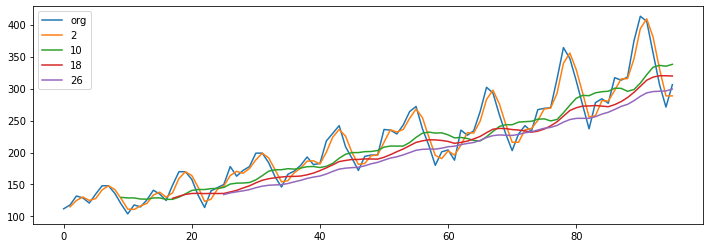

In [101]:
#Smoothning of the graph
plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
for i in range(2,30,8):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

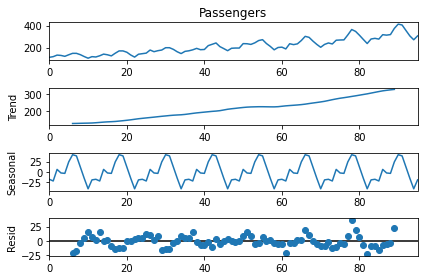

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airline.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

### ACF Plot

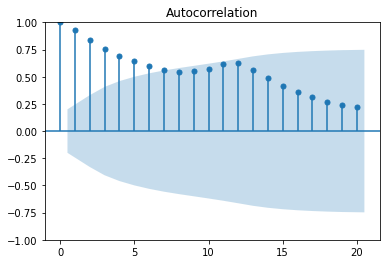

In [103]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(airline["Passengers"]) 

### PACF Plot

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


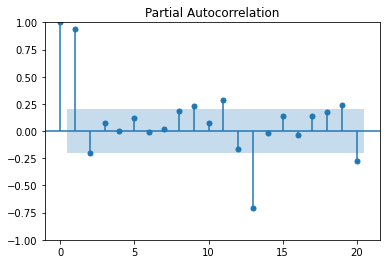

In [104]:
pacf = plot_pacf(airline["Passengers"]) 

# Forecasting Model Based Methods

### Data preprocessing

In [105]:
airline.shape

(96, 4)

In [106]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [107]:
#Convert dtype of year 
airline['year'] = airline['year'].astype("int64")

In [108]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.1+ KB


### Creating dummy variables

In [109]:
#OHE for month column
airline1 = pd.get_dummies(airline)
airline1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [110]:
x=np.arange(1,97)

In [111]:
#timesteps
t=pd.Series(data=x)
t

0      1
1      2
2      3
3      4
4      5
      ..
91    92
92    93
93    94
94    95
95    96
Length: 96, dtype: int32

In [112]:
#timesteps square values
t_sqr=pd.Series(data=(x*x))
t_sqr

0        1
1        4
2        9
3       16
4       25
      ... 
91    8464
92    8649
93    8836
94    9025
95    9216
Length: 96, dtype: int32

In [113]:
#log of number of passengers
airline1['log_passengers'] = np.log(airline1['Passengers'])

In [114]:
airline1['t'] = t

In [115]:
airline1['t_sqr'] = t_sqr

In [116]:
airline1.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802,3,9
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791,5,25


### Split Train and Test

In [117]:
Train = airline1.head(84)
Test = airline1.tail(12)

### Model Bbuilding

In [118]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [119]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()                                                              #Fit the train model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                              #predict on test data   
mae_linear = MAE(Test['Passengers'],pred_linear)                                                                     #calculate eoot mean sqr error 
mae_linear

0.12875898544471479

In [120]:
#Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
mae_Exp = MAE(Test['Passengers'], np.exp(pred_Exp))
mae_Exp

0.11102459391985826

In [121]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
mae_Quad = MAE(Test['Passengers'],pred_Quad)
mae_Quad

0.11838168080315846

In [122]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
mae_add_sea = MAE(Test['Passengers'],pred_add_sea)
mae_add_sea

0.6601957591766384

In [123]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sqr+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_sqr']]))
mae_add_sea_quad = MAE(Test['Passengers'], pred_add_sea_quad)
mae_add_sea_quad

0.055710861779884886

In [124]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
mae_Mult_sea = MAE(Test['Passengers'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7218240575033866

In [125]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
mae_Mult_add_sea = MAE(Test['Passengers'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.024187475026051147

# Forecasting by Data driven Model

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [127]:
airline.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [128]:
Train = airline.head(84)
Test = airline.tail(12)

In [129]:
#Simple Exponential Method

ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_ses = MAE(pred_ses,Test.Passengers) 
MAE_ses

0.1341127474051382

In [130]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test.Passengers) 
MAE_hw

C:\Users\USER\AppData\Local\Temp/ipykernel_556/200631384.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.23530719652100496

In [131]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,Test.Passengers) 
MAE__hwe_add_add

0.05734104506475249

In [132]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test.Passengers)
MAE__hwe_mul_add

0.028211250300088822

# Forecasting by ARIMA Model

In [133]:
from numpy import sqrt
import warnings
import itertools
import statsmodels.api as sm

In [134]:
df_airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [135]:
# separate out a validation dataset
split_point = len(df_airline) - 12
dataset, validation = df_airline[0:split_point], df_airline[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 84, Validation 12


### Persistence/Base Model

In [136]:
# evaluate a persistence model


# prepare data
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [137]:
train.size, test.size

(42, 42)

In [138]:
from sklearn.metrics import mean_squared_error
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
MAE_base = MAE(predictions, test)
print('MAE_base: %.3f' % MAE_base)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

### SARIMA Model

In [139]:
df_airline = pd.read_excel('Airlines+Data.xlsx')

In [140]:
df_airline.set_index('Month',inplace=True)

In [141]:
df_airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [142]:
#performing test to check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [143]:
adf_test(df_airline['Passengers'])

ADF Statistics: 1.3402479596467018
p- value: 0.9968250481137263
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [144]:
## Use Techniques Differencing 1st time
df_airline['Passengers First Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(12)


In [145]:
df_airline.iloc[10:20]

,Passengers,Passengers First Difference
Month,,
1995-11-01,104,NaN
1995-12-01,118,NaN
1996-01-01,115,3.0
1996-02-01,126,8.0
1996-03-01,141,9.0
1996-04-01,135,6.0
1996-05-01,125,4.0
1996-06-01,149,14.0
1996-07-01,170,22.0


In [146]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.6900043838623167
p- value: 0.07578397625851754
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [147]:
#Use techniques differencing 2nd time
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(12)

In [148]:
df_airline.iloc[20:30]

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1996-09-01,158,22.0,NaN
1996-10-01,133,14.0,NaN
1996-11-01,114,10.0,NaN
1996-12-01,140,22.0,NaN
1997-01-01,145,30.0,27.0
1997-02-01,150,24.0,16.0
1997-03-01,178,37.0,28.0
1997-04-01,163,28.0,22.0
1997-05-01,172,47.0,43.0


In [149]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -2.1094801421381826
p- value: 0.24071971540603815
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [150]:
#use techniques differencing 2nd time
df_airline['Passengers Third Difference']=df_airline['Passengers Second Difference']-df_airline['Passengers Second Difference'].shift(12)

In [151]:
df_airline.iloc[30:40]

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers Third Difference
Month,,,,
1997-07-01,199,29.0,7.0,NaN
1997-08-01,199,29.0,7.0,NaN
1997-09-01,184,26.0,4.0,NaN
1997-10-01,162,29.0,15.0,NaN
1997-11-01,146,32.0,22.0,NaN
1997-12-01,166,26.0,4.0,NaN
1998-01-01,171,26.0,-4.0,-31.0
1998-02-01,180,30.0,6.0,-10.0
1998-03-01,193,15.0,-22.0,-50.0


In [152]:
adf_test(df_airline['Passengers Third Difference'].dropna())

ADF Statistics: -4.893824055490131
p- value: 3.5852657613943486e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


#### We can perform ARIMA on Passangers Third Difference data as this is stationanry

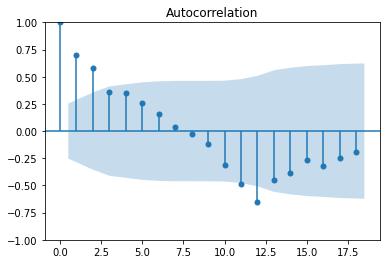

In [153]:
acf = plot_acf(df_airline["Passengers Third Difference"].dropna())   

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


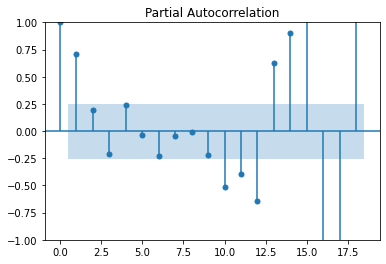

In [154]:
pacf = plot_pacf(df_airline["Passengers Third Difference"].dropna()) 

In [155]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1999,12,1)
test_dataset_end=datetime(2002,12,1)

In [156]:

train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [157]:
## create a SARIMA model as we are working with seasonal data
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [158]:
model_SARIMA=SARIMAX(train_data['Passengers'],order=(10,0,2),seasonal_order=(0,3,0,12))

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [159]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [160]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   60
Model:             SARIMAX(10, 0, 2)x(0, 3, [], 12)   Log Likelihood                -106.783
Date:                              Tue, 25 Oct 2022   AIC                            239.565
Time:                                      18:14:26   BIC                            254.880
Sample:                                  01-01-1995   HQIC                           243.628
                                       - 12-01-1999                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5799      0.629      0.922      0.356      -0.652       1.812
ar.L2          0.4939      0.714      0.691      0.489      -0.906       1.894
ar.L3         -0.4801      0.616     -0.780      0.436      -1.687       0.727
ar.L4          0.1986      0.546      0.363      0.716      -0.872       1.270
ar.L5         -0.1637      0.484     -0.338      0.735      -1.112       0.784
ar.L6         -0.0070      0.479     -0.015      0.988      -0.945       0.931
ar.L7         -0.0391      0.584     -0.067      0.947      -1.184       1.106
ar.L8         -0.0791      0.319     -0.248      0.804      -0.704       0.546
ar.L9          0.3844      0.615      0.625      0.532      -0.821       1.590
ar.L10        -0.4761      0.439     -1.085      0.278      -1.336       0.384
ma.L1          0.2005     12.468      0.016      0.987     -24.237      24.638
ma.L2         -0.7815     10.160     -0.077      0.939     -20.695      19.132
sigma2        98.1737   1201.477      0.082      0.935   -2256.679    2453.026
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.27   Prob(JB):                         0.45
Heteroskedasticity (H):               0.92   Skew:                            -0.16
Prob(H) (two-sided):                  0.91   Kurtosis:                         1.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
test_data.tail()

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers Third Difference
Month,,,,
2002-08-01,405,58.0,4.0,-29.0
2002-09-01,355,43.0,-10.0,-41.0
2002-10-01,306,32.0,-13.0,-40.0
2002-11-01,271,34.0,0.0,-11.0
2002-12-01,306,28.0,-21.0,-42.0


In [162]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2000-01-01 00:00:00
2002-12-01 00:00:00


In [163]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2000,1,1),end=datetime(2002,12,1))

In [164]:
MAE_Sarima = MAE(pred_Sarima, test_data['Passengers'])
MAE_Sarima 

0.16040831026552216

In [165]:
#Compare the results 

data = {"MODEL":pd.Series(["MAE_linear","MAE_Exp","MAE_Quad","MAE_add_sea","MAE_add_sea_quad","MAE_Mult_sea","MAE_Mult_add_sea","MAE_ses","MAE_hw","MAE_hwe_add_add","MAE__hwe_mul_add","MAE_base","MAE_SARIMA"]),"MAE_Values":pd.Series([mae_linear,mae_Exp,mae_Quad,mae_add_sea,mae_add_sea_quad,mae_Mult_sea,mae_Mult_add_sea,MAE_ses,MAE_hw,MAE__hwe_add_add,MAE__hwe_mul_add,MAE_base,MAE_Sarima])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
6,MAE_Mult_add_sea,0.024187
10,MAE__hwe_mul_add,0.028211
4,MAE_add_sea_quad,0.055711
9,MAE_hwe_add_add,0.057341
11,MAE_base,0.089354
1,MAE_Exp,0.111025
2,MAE_Quad,0.118382
0,MAE_linear,0.128759
7,MAE_ses,0.134113
12,MAE_SARIMA,0.160408


#### From all models, Multiplicative Additive Seasonality giving best results(Test MAE is low for this data)
#### Let's build a model and forecast year of 2003

### Predict on new data

In [166]:
Test = airline1.tail(12)

In [167]:
Test.to_csv('predict_data.csv')
#Edited the test data a little to forecast passengers for year 2003

In [169]:
#try to predict the data for the whole yearr of 2022
predict_data = pd.read_csv('predict_data.csv')
predict_data.head()

,Unnamed: 0,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr
0,84,2002-01-01,284,2002,0,0,0,0,1,0,0,0,0,0,0,0,5.648974,85,7225
1,85,2002-02-01,277,2002,0,0,0,1,0,0,0,0,0,0,0,0,5.624018,86,7396
2,86,2002-03-01,317,2002,0,0,0,0,0,0,0,1,0,0,0,0,5.758902,87,7569
3,87,2002-04-01,313,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.746203,88,7744
4,88,2002-05-01,318,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.762051,89,7921


In [170]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12 non-null     int64  
 1   Month           12 non-null     object 
 2   Passengers      12 non-null     int64  
 3   year            12 non-null     int64  
 4   month_Apr       12 non-null     int64  
 5   month_Aug       12 non-null     int64  
 6   month_Dec       12 non-null     int64  
 7   month_Feb       12 non-null     int64  
 8   month_Jan       12 non-null     int64  
 9   month_Jul       12 non-null     int64  
 10  month_Jun       12 non-null     int64  
 11  month_Mar       12 non-null     int64  
 12  month_May       12 non-null     int64  
 13  month_Nov       12 non-null     int64  
 14  month_Oct       12 non-null     int64  
 15  month_Sep       12 non-null     int64  
 16  log_passengers  12 non-null     float64
 17  t               12 non-null     int64

In [171]:
#Convert Month column dtype to datetime64
predict_data['Month'] = predict_data['Month'].astype("datetime64[ns]")

In [173]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      12 non-null     int64         
 1   Month           12 non-null     datetime64[ns]
 2   Passengers      12 non-null     int64         
 3   year            12 non-null     int64         
 4   month_Apr       12 non-null     int64         
 5   month_Aug       12 non-null     int64         
 6   month_Dec       12 non-null     int64         
 7   month_Feb       12 non-null     int64         
 8   month_Jan       12 non-null     int64         
 9   month_Jul       12 non-null     int64         
 10  month_Jun       12 non-null     int64         
 11  month_Mar       12 non-null     int64         
 12  month_May       12 non-null     int64         
 13  month_Nov       12 non-null     int64         
 14  month_Oct       12 non-null     int64         
 15  month_Se

In [174]:
#Build model on whole airline1 data with Multiplicative Additive Seasonality model
final_model = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = airline1).fit()

In [175]:
#this give us log_passengers 
pred_new  = pd.Series(final_model.predict(predict_data))
pred_new

0     5.636031
1     5.646556
2     5.789735
3     5.756882
4     5.750359
5     5.874202
6     5.980456
7     5.978339
8     5.868100
9     5.737989
10    5.607538
11    5.744085
dtype: float64

In [176]:
#Get number of passengers
import math
passengers = []
for i in range(0,12):
  passengers.append(round(math.exp(pred_new[i]),0))

In [177]:
predict_data["Passengers"] = passengers

In [178]:
predict_data["forecasted_log_passengers"] = pd.Series(pred_new)

In [179]:
predict_data.head()

,Unnamed: 0,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr,forecasted_log_passengers
0,84,2002-01-01,280.0,2002,0,0,0,0,1,0,0,0,0,0,0,0,5.648974,85,7225,5.636031
1,85,2002-02-01,283.0,2002,0,0,0,1,0,0,0,0,0,0,0,0,5.624018,86,7396,5.646556
2,86,2002-03-01,327.0,2002,0,0,0,0,0,0,0,1,0,0,0,0,5.758902,87,7569,5.789735
3,87,2002-04-01,316.0,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.746203,88,7744,5.756882
4,88,2002-05-01,314.0,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.762051,89,7921,5.750359


In [180]:
predict_data.tail()

,Unnamed: 0,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr,forecasted_log_passengers
7,91,2002-08-01,395.0,2002,0,1,0,0,0,0,0,0,0,0,0,0,6.003887,92,8464,5.978339
8,92,2002-09-01,354.0,2002,0,0,0,0,0,0,0,0,0,0,0,1,5.872118,93,8649,5.868100
9,93,2002-10-01,310.0,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.723585,94,8836,5.737989
10,94,2002-11-01,272.0,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.602119,95,9025,5.607538
11,95,2002-12-01,312.0,2002,0,0,1,0,0,0,0,0,0,0,0,0,5.723585,96,9216,5.744085


#### This is the predicted airline passangers data for whole year of 2003
#### As observed that Aug & Sept have high passangers, we can observe a similar trend in predicted data as well.

### Reflect accuracy of model by plot

<AxesSubplot: >

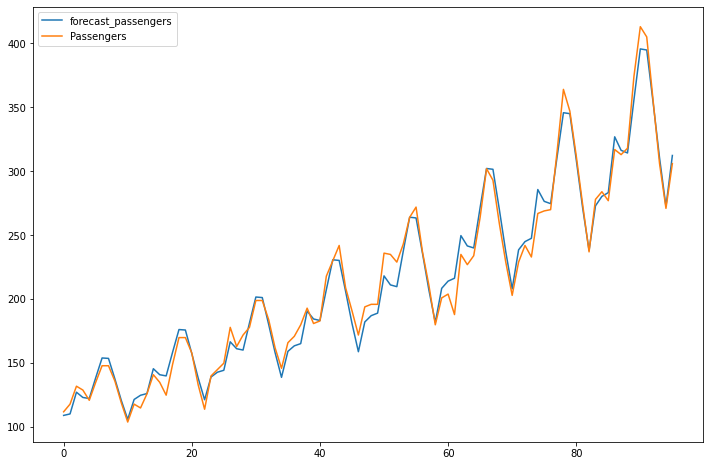

In [181]:
airline1['forecast_passengers']=np.exp(pd.Series(final_model.predict(airline1)))
airline1[['forecast_passengers','Passengers']].plot(figsize=(12,8))